<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# Equal Variance test

1. Bartlett's test
2. Levene's test
3. Fligner's test

---

## Import Packages
- Visual Python: Data Analysis > Import

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['axes.unicode_minus'] = False

## Read data
- Visual Python: Data Analysis > File

In [3]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/04_1_등분산검정.csv')
df

,성별,여행빈도,해외여행선호도
0,남자,적음,2.0
1,남자,적음,3.0
2,남자,적음,2.0
3,남자,적음,4.0
4,남자,적음,2.0
5,남자,중간,4.0
6,남자,중간,4.0
7,남자,중간,5.0
8,남자,중간,3.0
9,남자,중간,3.0


## 1. Bartlett test

,Variance
남자,5.666667
여자,1.257143


### Bartlett test

,Statistic,p-value
Equal Variance test (Bartlett),7.031605,0.008008


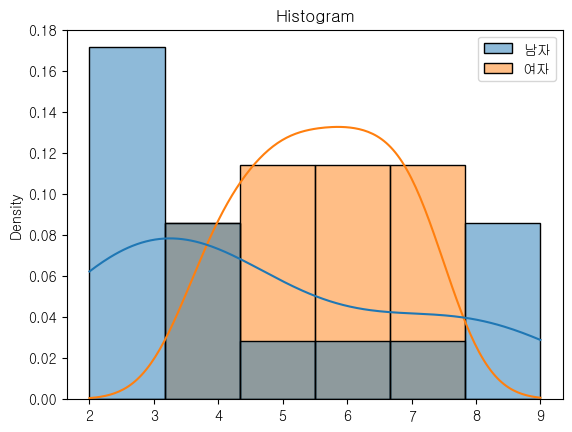

In [4]:
# Visual Python: Equal Var. test
# Bartlett test
vp_df = df.dropna().copy()
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('성별')['해외여행선호도'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Variance
from IPython.display import display, Markdown
from scipy import stats
_dfr = _df.var().to_frame()
_dfr.columns = ['Variance']
display(_dfr)

# Bartlett test
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.bartlett(*_lst)
display(Markdown('### Bartlett test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},
                     index=['Equal Variance test (Bartlett)']))

# Histogram
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(_df, stat='density', kde=True)
    plt.title('Histogram')
    plt.show()

## 2.  Levene test 

,Variance
많음,1.433333
적음,4.266667
중간,0.544444


### Levene test

,Statistic,p-value
Equal Variance test (Levene),9.081159,0.000964


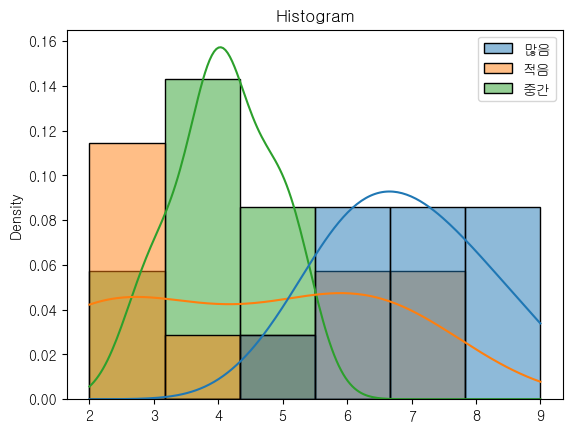

In [5]:
# Visual Python: Equal Var. test
# Levene test
vp_df = df.dropna().copy()
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('여행빈도')['해외여행선호도'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Variance
from IPython.display import display, Markdown
from scipy import stats
_dfr = _df.var().to_frame()
_dfr.columns = ['Variance']
display(_dfr)

# Levene test
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Levene test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},
                     index=['Equal Variance test (Levene)']))

# Histogram
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(_df, stat='density', kde=True)
    plt.title('Histogram')
    plt.show()

## 3. Fligner test

,Variance
남자,5.666667
여자,1.257143


### Fligner test

,Statistic,p-value
Equal Variance test (Fligner),9.116413,0.002533


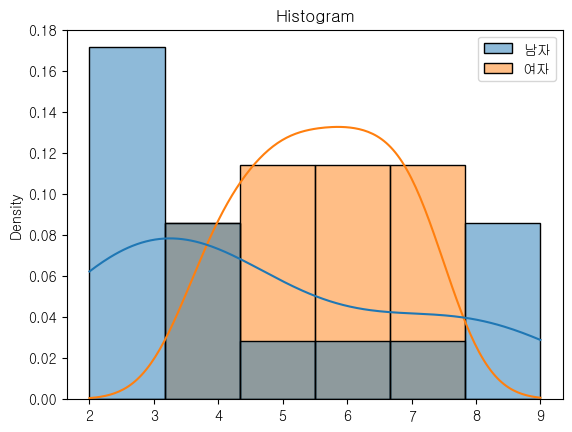

In [6]:
# Visual Python: Equal Var. test
# Fligner test
vp_df = df.dropna().copy()
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('성별')['해외여행선호도'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Variance
from IPython.display import display, Markdown
from scipy import stats
_dfr = _df.var().to_frame()
_dfr.columns = ['Variance']
display(_dfr)

# Fligner test
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.fligner(*_lst, center='mean')
display(Markdown('### Fligner test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},
                     index=['Equal Variance test (Fligner)']))

# Histogram
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(_df, stat='density', kde=True)
    plt.title('Histogram')
    plt.show()

---

In [7]:
# End of file